In [1]:
from stable_baselines.td3 import TD3, LnCnnPolicy, LnMlpPolicy
from env import *
import tensorflow as tf
from config import config

/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cocowang/anaconda3/envs/base

In [2]:
policy = LnMlpPolicy
env = SketchDesigner(SketchDiscriminator(config['SAVED_GAN']))
agent = TD3(policy, env, random_exploration=0.1, tensorboard_log='./log/',verbose=1)
#agent.get_env().env_method('get_policy', agent.policy_tf)
agent.get_env().get_policy(agent.policy_tf)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./saved_gan/2/model1.ckpt
Instructions for updating:
Use tf.cast instead.


In [3]:
agent.load('./save/3/model',env = env)

In [4]:
from matplotlib import pyplot as plt

In [5]:
ax = np.random.randint(0,28,2)
env.canvas[ax[0], ax[1], 0]

0.0

2755


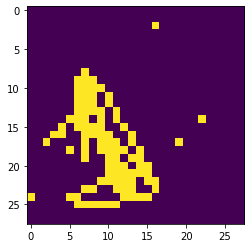

In [18]:
env.reset()
for _ in range(5):
    ax = np.random.randint(0,28,2)
    env.canvas[ax[0], ax[1], 0] = 1
while True:
    #act = agent.predict(env.get_state().reshape(-1,28,28,1))[0]
    act = agent.predict(env.canvas)[0]
    _, _,terminal,_ = env.step(act)
    if terminal:
        print(env.stroke_count)
        break
        
env.render()

In [60]:
agent.policy_tf.step(env.canvas.reshape(-1,28,28,1))

array([[ 0.9277456 , -0.7457006 ,  0.55001634,  0.4474837 , -0.21874923,
        -0.9204615 ,  0.6754476 , -0.505924  , -0.80073076, -0.04806415,
         0.3319054 , -0.42670625,  0.45278698,  0.8501624 ]],
      dtype=float32)

In [38]:
env.canvas.reshape(-1,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
      

In [45]:
agent.predict(env.canvas)

(array([ 0.9402885 , -0.14232504, -0.68764484, -0.251423  ,  0.7920793 ,
        -0.6521572 , -0.7735094 , -0.53632724,  0.13872646,  0.00753317,
        -0.7238335 , -0.3144457 , -0.6290908 , -0.37987512], dtype=float32),
 None)

In [20]:
act

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# Rest are for GAN test

In [ ]:
from pretrianGAN.DataLoader import DataLoader
from pretrianGAN.utils import *
import tensorflow as tf
import numpy as np
from pretrianGAN.config import config

In [ ]:
dloader = DataLoader(config['DATA_PATH'])

#tf.reset_default_graph()
batch_size = config['BATCH_SIZE']
n_noise = config['N_NOISE']

X_in = tf.placeholder(dtype=tf.float32, shape=[None] + config['IMAGE_DIM'], name='X')
noise = tf.placeholder(dtype=tf.float32, shape=[None, n_noise])

rate = tf.placeholder(dtype=tf.float32, name='rate')
is_training = tf.placeholder(dtype=tf.bool, name='is_training')

g = generator(noise, rate=rate, is_training=is_training)
d_real = discriminator(X_in, rate=rate)
d_fake = discriminator(g, rate,reuse=True)

In [ ]:
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver.restore(sess, tf.train.latest_checkpoint('./saved_gan/2'))

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.draw import line

In [ ]:
n = np.random.uniform(0.0, 1.0, [64, 64]).astype(np.float32)
imgs = sess.run(g, feed_dict = {noise: n,
                               rate: 1.0,
                               is_training: False})

In [ ]:
plt.imshow(imgs[2].reshape(28,28))

In [ ]:
np.max(imgs[6])

In [ ]:
def deblur(img):
    return np.array([np.array([1 if i > 150 else 0 for i in im]) for im in img]).reshape(-1,784)

In [ ]:
data = np.load('./data/triangle.npy')
data_new = deblur(data[0:10])

In [ ]:
img = np.zeros((28, 28), dtype=np.uint8)
rr, cc = line(3, 13, 24, 23)
img[rr, cc] = 255
rr, cc = line(24, 23, 22, 3)
img[rr, cc] = 255
rr, cc = line(22, 3, 3, 14)
img[rr, cc] = 255
plt.imshow(img)

In [ ]:
results = sess.run(d_real, feed_dict = {X_in: imgs.reshape(-1,28,28),
                               rate: 0.0,
                               is_training: False})

In [ ]:
results = sess.run(d_real, feed_dict = {X_in: img.reshape(-1, 28 ,28),
                               rate: 1.0,
                               is_training: False})
results

In [ ]:
plt.imshow(imgs[-1].reshape(28,28))